# Wigner function to Density matrix

In [18]:
import numpy as np
from scipy.special import genlaguerre, factorial
from WignerDensity import rho_to_Wigner, Wigner_to_rho

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# Global plot style settings
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "mathtext.fontset": "cm",            # Use Computer Modern for math
    "font.size": 14,                     # Base font size
    "axes.labelsize": 16,                # Axis label font size
    "axes.titlesize": 16,                # Title font size
    "legend.fontsize": 13,               # Legend font size
    "xtick.labelsize": 13,               # X tick label size
    "ytick.labelsize": 13,               # Y tick label size
    "axes.linewidth": 1.2,               # Thicker axis lines
    "xtick.direction": "in",             # x-yick direction
    "ytick.direction": "in",             # y-tick direction
    "text.usetex": False,                # Enable LaTeX if needed
    "figure.dpi": 150,                   # Good resolution for screens
    "savefig.dpi": 300                   # High resolution for saving
})

In [19]:
# Define function for nice plotting
def PlotSettings(ax, gridlines=False, minimalist=False):
    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    # Minimalist style
    if minimalist:
        # Hide top and right spines (borders)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # Ticks only on bottom and left
        ax.tick_params(which='both', top=False, right=False)
    else:
        # Tick parameters
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='major', length=7, width=1.2)
        ax.tick_params(which='minor', length=4, width=1)
    # Optional grid
    if gridlines:
        ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)
        ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.4)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
54.3 ms ± 2.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


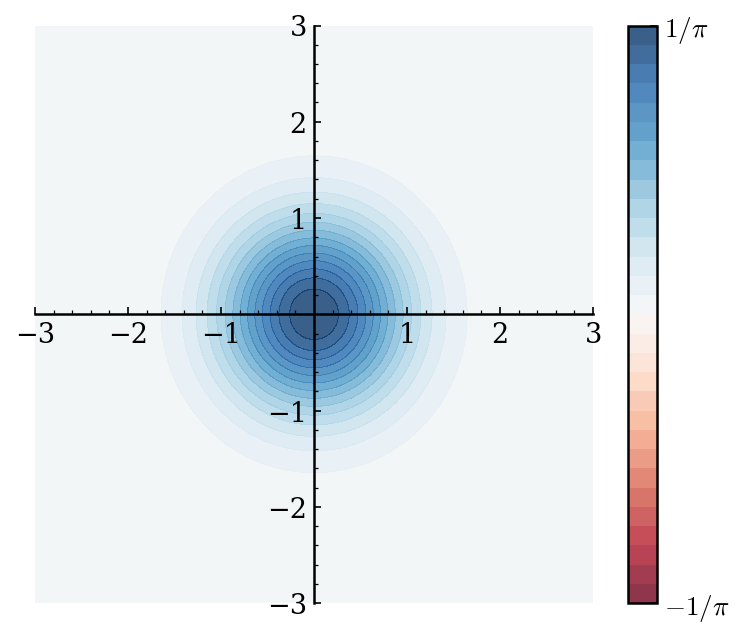

74 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
[[ 1.+0.j  0.-0.j -0.-0.j -0.+0.j -0.-0.j]
 [ 0.+0.j -0.+0.j -0.-0.j  0.+0.j -0.-0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j]
 [-0.-0.j  0.-0.j -0.-0.j -0.+0.j  0.-0.j]
 [-0.+0.j -0.+0.j -0.-0.j  0.+0.j -0.+0.j]]
9.322380235538075e-06


In [20]:
dim = 5
ngrid = 201
rho = np.zeros((dim, dim), dtype=complex)
rho[0, 0] = 1.0  # |1><1|
print(rho)

xgrid = np.linspace(-3, 3, ngrid)
pgrid = np.linspace(-3, 3, ngrid)

%timeit rho_to_Wigner(rho, xgrid, pgrid)
W = rho_to_Wigner(rho, xgrid, pgrid)


# Plot
X, Y = np.meshgrid(xgrid, pgrid)
vmin, vmax = -1/np.pi, 1/np.pi
levels = np.linspace(vmin, vmax, 31)  # force levels across full range

fig, ax = plt.subplots(figsize=(6, 5))
# Filled contours with transparency
contour_filled = ax.contourf(X, Y, np.real(W), levels=levels,
                             cmap='RdBu', alpha=0.8, vmin=vmin, vmax=vmax)
# Colorbar
cbar = fig.colorbar(contour_filled, ax=ax, ticks=[-1/np.pi, 1/np.pi])
cbar.ax.set_yticklabels([r"$-1/\pi$", r"$1/\pi$"])  # custom tick labels if needed
# Move axes to cross at (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Set x- and y-ticks skipping 0
ax.set_xticks([-3, -2, -1, 1, 2, 3])
ax.set_yticks([-3, -2, -1, 1, 2, 3])
PlotSettings(ax, minimalist=True)
plt.show()

# Recover rho from Wigner
%timeit Wigner_to_rho(W, xgrid, pgrid, dim)
rho_rec = Wigner_to_rho(W, xgrid, pgrid, dim)

print(np.round(rho_rec, 3))

err = np.linalg.norm(rho_rec - rho)
print(err)

Approx. 50 ms

In [21]:
dim = 4
rho = np.zeros((dim,dim), dtype=complex)
rho[0,1] = 0.6 * np.exp(1j*0.7)   # known magnitude and phase
rho[1,0] = rho[0,1].conj()
print(rho)
xgrid = np.linspace(-5, 5, ngrid)
pgrid = np.linspace(-5, 5, ngrid)
W = rho_to_Wigner(rho, xgrid, pgrid)
rho_rec = Wigner_to_rho(W, xgrid, pgrid, dim)

[[0.        +0.j         0.45890531+0.38653061j 0.        +0.j
  0.        +0.j        ]
 [0.45890531-0.38653061j 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]]


In [22]:
err = np.linalg.norm(rho_rec - rho)
print(err)

1.8426096367916106e-16
